**Breast Cancer Dataset EDA**

In [13]:
%pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Create the API client
api = KaggleApi()
api.authenticate()  # Uses ~/.kaggle/kaggle.json


In [3]:
api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    "wasiqaliyasir/breast-cancer-dataset",
    path="/tmp/breast_cancer_data",
    unzip=True
)


Dataset URL: https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset


In [36]:
import pandas as pd
import numpy as np
import os


print(os.listdir("/tmp/breast_cancer_data"))  # check files


['Breast_cancer_dataset.csv']


In [6]:
bcancer = pd.read_csv("/tmp/breast_cancer_data/Breast_cancer_dataset.csv")
bcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Exploratory Data Analysis:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
bcancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_26637/22463708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


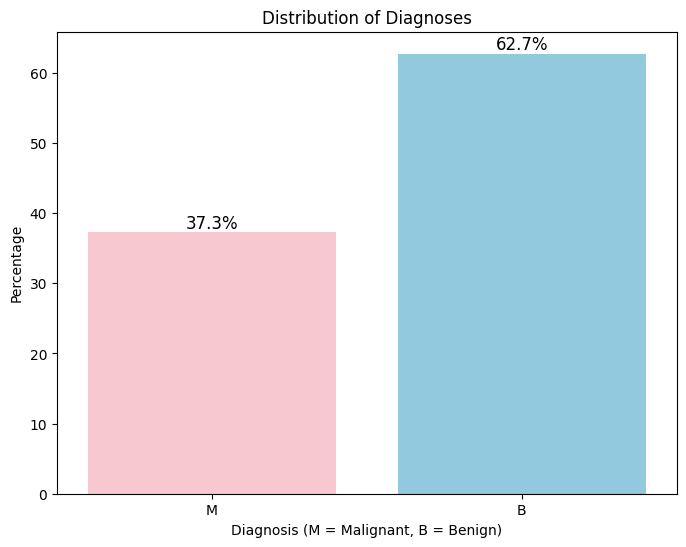

In [9]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    x="diagnosis", 
    data=bcancer, 
    palette=["pink", "skyblue"], 
    stat="percent"   
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Percentage")
ax.set_title("Distribution of Diagnoses")
ax.set_xlabel("Diagnosis (M = Malignant, B = Benign)")
plt.show()


So from this I can tell that 37% of the women in this sample tested positive for breast cancer. I now want to see how the other factors, such as radius and compactness can affect the likelihood of having breast cancer.  I only want to look at the mean, so I need to create a dataset that only has the columns I want to look at.

In [10]:
%pip install --upgrade nbformat


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sys
!{sys.executable} -m pip install plotly

import sys
!{sys.executable} -m pip install -U nbformat




[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [25]:
bcancer_df = bcancer.iloc[:, :12]   # rows: all, columns: 0 → 11
bcancer_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [32]:
import plotly.express as px

fig = px.histogram(
    data_frame=bcancer_df,
    x="radius_mean",
    color="diagnosis",
    color_discrete_sequence=["pink","skyblue"]
)
fig.show()


**Attempt at ML predictive model**

Data Preprocessing

In [28]:
bcancer_df['diagnosis'] = bcancer_df['diagnosis']
bcancer_df = bcancer_df.drop(columns='id')
bcancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [30]:
features = [col for col in bcancer_df.columns if col != 'diagnosis']

for column in features:
    Q1 = bcancer_df[column].quantile(0.25)
    Q3 = bcancer_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    bcancer_df1 = bcancer_df[(bcancer_df[column] >= lower_bound) & (bcancer_df[column] <= upper_bound)]

print(f"Previous Dataset Size: {bcancer_df.shape[0]}")
print(f"New Dataset Size: {bcancer_df1.shape[0]}")

Previous Dataset Size: 569
New Dataset Size: 562


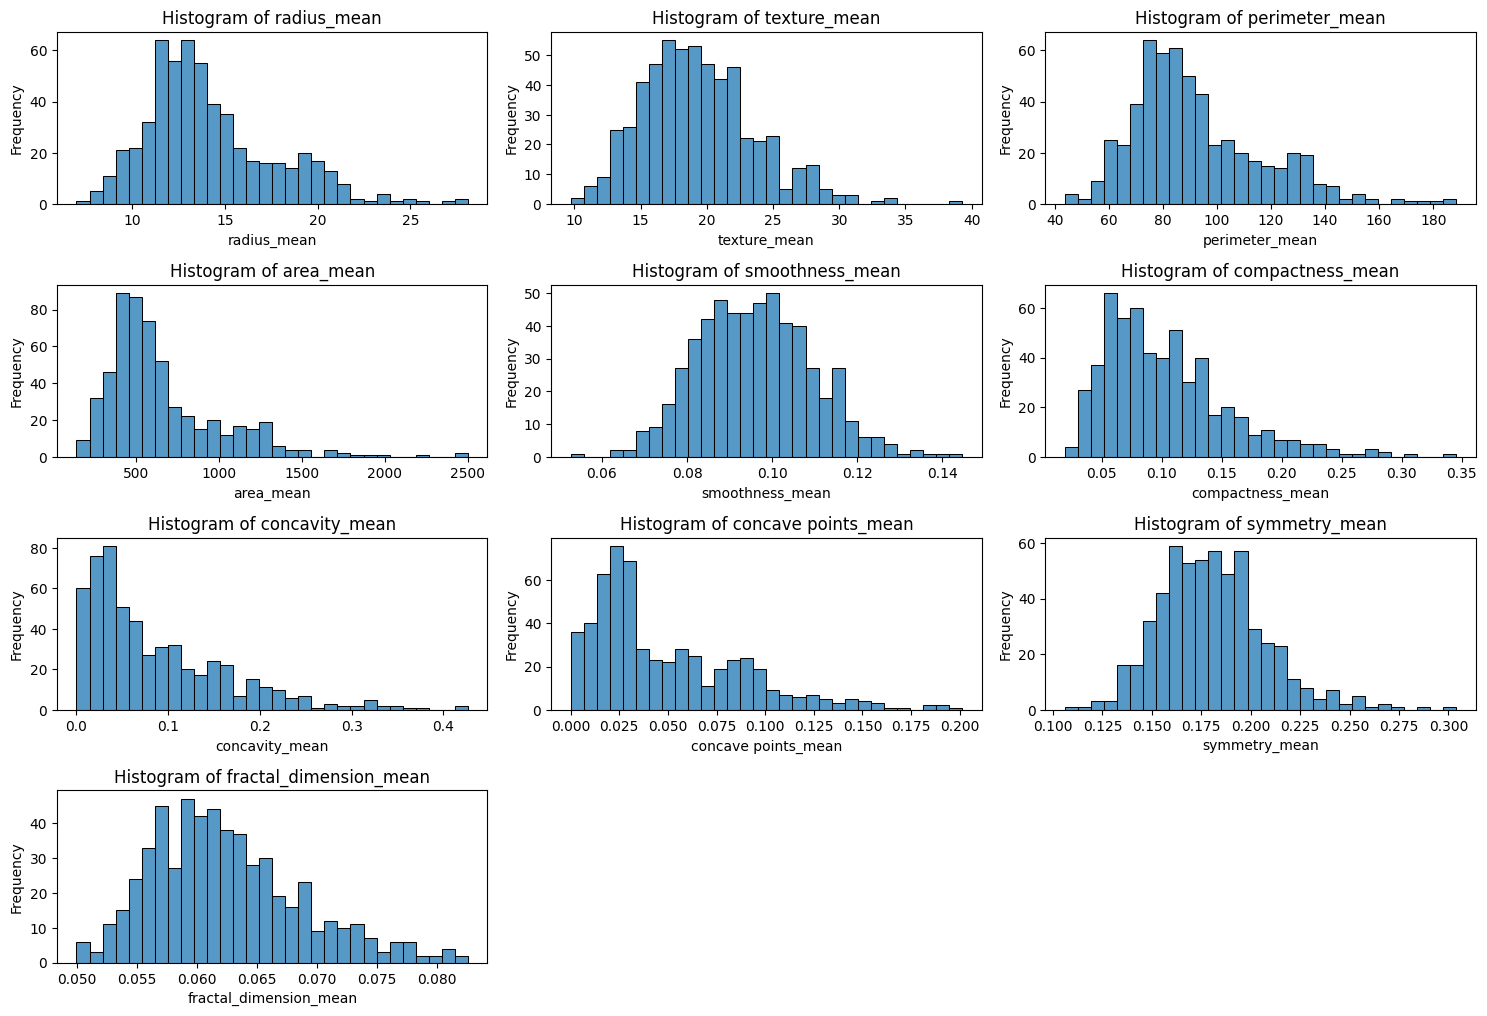

In [31]:
fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(bcancer_df1[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [42]:
%pip install scipy
from scipy.stats import skew





[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
skewness = bcancer_df1[features].apply(lambda x: skew(x))
print('skew values\n',skewness)

for column in features:
    if skewness[column] > 0.5:
        bcancer_df1[column] = np.log1p(bcancer_df1[column])
    elif skewness[column] < -0.5:
        bcancer_df1[column] = np.expm1(bcancer_df1[column])


new_skewness = bcancer_df1[features].apply(lambda x: skew(x))
print('new skew values\n', new_skewness)

skew values
 radius_mean               0.941908
texture_mean              0.646310
perimeter_mean            0.983943
area_mean                 1.641085
smoothness_mean           0.264764
compactness_mean          1.209627
concavity_mean            1.386856
concave points_mean       1.178913
symmetry_mean             0.721881
fractal_dimension_mean    0.722974
dtype: float64
new skew values
 radius_mean               0.348649
texture_mean              0.014269
perimeter_mean            0.320264
area_mean                 0.288177
smoothness_mean           0.264764
compactness_mean          1.059103
concavity_mean            1.198456
concave points_mean       1.091612
symmetry_mean             0.626574
fractal_dimension_mean    0.707294
dtype: float64


/var/folders/z_/5vjxj12n6l1_lx8vl9hfs5h80000gn/T/ipykernel_26637/4088473506.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



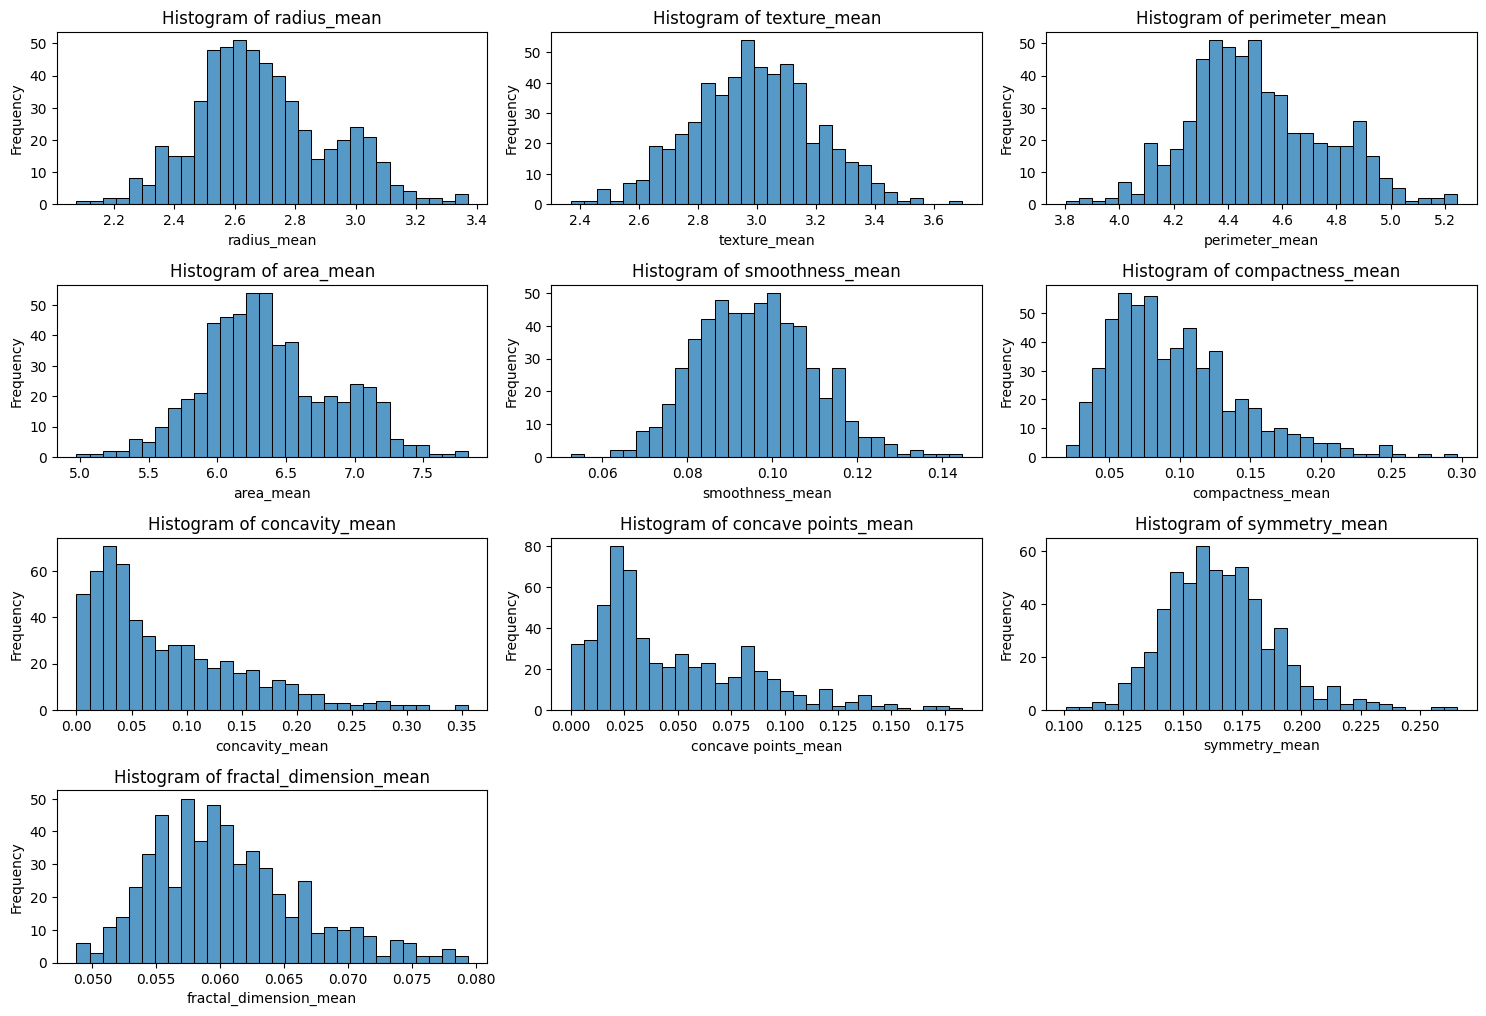

In [39]:
features = [col for col in bcancer_df1.columns if col != 'diagnosis']

fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(bcancer_df1[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


Model

In [44]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 26.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X = bcancer_df1.drop('diagnosis', axis=1)
y = bcancer_df1['diagnosis']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=51
)

In [47]:
lr_model = LogisticRegression(random_state=51, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, y_pred_lr)}')
print(f'classification report:\n {classification_report(y_test, y_pred_lr)}')

accuracy score: 0.9292035398230089
classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.94      0.90      0.92        50

    accuracy                           0.93       113
   macro avg       0.93      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113



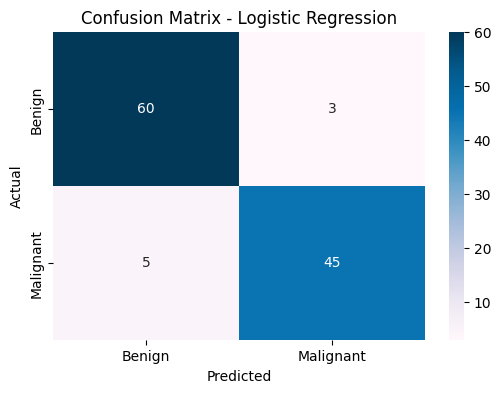

In [67]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Top-left (True Negatives) → correctly predicted Benign.

Bottom-right (True Positives) → correctly predicted Malignant.

Top-right (False Positives) → predicted Malignant but actually Benign.

Bottom-left (False Negatives) → predicted Benign but actually Malignant.